# A Walk Down the Aisle at the Superstore

![eduardo-soares-RTPrTSooj0c-unsplash](eduardo-soares-RTPrTSooj0c-unsplash.jpg)
_Photo by <a href="https://unsplash.com/@eduschadesoares?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Eduardo Soares</a> on <a href="https://unsplash.com/photos/text-RTPrTSooj0c?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>_

The Superstore dataset contains a sample CSV of sales transactions (date, customer, product, quantity, price).

For practice, the following tasks will be completed:

1. Checking for missing or duplicate values
2. Calculating total sales per customer
3. Identifying best-selling products
4. Analyzing sales trends over time
6. Segmenting sales by region and category

## Just a quick setup

In [1]:
import numpy as np
import pandas as pd

super = pd.read_csv("superstore.csv", encoding='latin1')
super.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


## 1. A check for missing values and duplicates

In [2]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
# Convert 'Order Date' column to datetime object
super['Order Date'] = pd.to_datetime(super['Order Date'], errors='coerce')

In [4]:
super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Calculate total sales per customer

In [5]:
# Group by Customer Name and compute the total sales and number of orders.
# Sort to find top customers.
top_df = super.groupby("Customer Name").agg({
    "Order ID": "count",
    "Sales": "sum"
}).sort_values(by="Sales", ascending=False).iloc[0:10]
top_df.head()

,Order ID,Sales
Customer Name,,
Sean Miller,15,25043.050
Tamara Chand,12,19052.218
Raymond Buch,18,15117.339
Tom Ashbrook,10,14595.620
Adrian Barton,20,14473.571


## 3. Identify best-selling products

In [13]:
# Group by Product Name and sum the Quantity or Sales to find the most popular and highest-grossing products.
most_pop = super.groupby("Product Name")[["Quantity", "Sales"]].agg("sum").sort_values("Quantity", ascending=False).iloc[0:10]
most_pop.head()

,Quantity,Sales
Product Name,,
Staples,215,755.470
Staple envelope,170,1686.812
Easy-staple paper,150,2504.192
Staples in misc. colors,86,478.812
KI Adjustable-Height Table,74,4552.641


In [16]:
# Optionally, break it down further by Category or Region.
most_pop = super.groupby(["Category"])[["Quantity", "Sales"]].agg("sum").sort_values("Quantity", ascending=False)
most_pop.head()

,Quantity,Sales
Category,,
Office Supplies,22906,719047.0320
Furniture,8028,741999.7953
Technology,6939,836154.0330


## 4. Analyze Trends Over Time

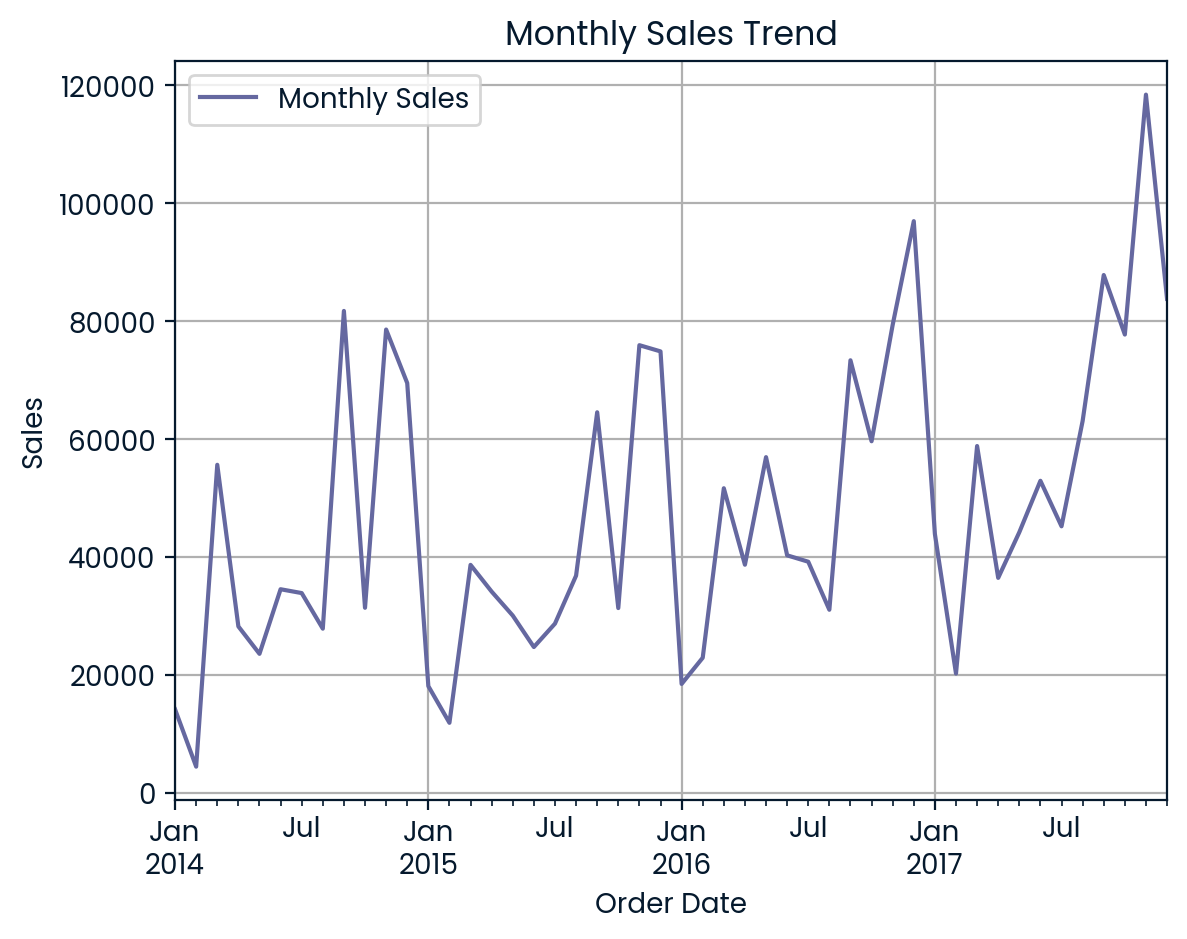

In [36]:
# Resample or group the data by month using the Order Date column.
resampled = super.pivot_table(index=super["Order Date"].dt.to_period("M"), values="Sales", aggfunc="sum")
resampled.head()

# Plot or summarize the monthly sales trend to identify peak seasons.
import matplotlib.pyplot as plt
resampled.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend(["Monthly Sales"])
plt.grid(True)  # Show grid lines
plt.show()

 ## 5. Segment Sales by Region and Category

In [25]:
# Use a pivot table or groupby to calculate total sales and profit by Region and Category.
# Analyze which regions/categories are underperforming or most profitable.

# Total sales by region using pivot_table
piv = super.pivot_table(index="Region", values="Sales", aggfunc="sum")
min_piv = piv[piv["Sales"] == piv["Sales"].min()]

# Print region with lowest sales
print(min_piv)

             Sales
Region            
South   391721.905


In [33]:
# Total sales by categories using .groupby()
grp = pd.DataFrame(super.groupby("Category")["Sales"].sum())
max_grp = grp[grp["Sales"] == grp["Sales"].max()]

# Print category with maximum sales
print(max_grp)

                 Sales
Category              
Technology  836154.033
